# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras` (that is in fact embedded inside a larger library called `tensorflow`, but we will not discuss `tensorflow` in this course).
You should visit [`keras` webpage](https://www.tensorflow.org/guide/keras/overview) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [4]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [ ]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [5]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [6]:
x_train, x_test, y_train, y_test = prepare_boston()

57026/57026 [==============================] - 0s 0us/step


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [7]:
import numpy as np
dimX = np.shape(x_train)[1]

input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])

model.compile(optimizer="sgd", loss="mse", metrics=["mse"])

h=model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=100)
print(h.history)

Epoch 1/10
5/5 - 0s - loss: 1.0535 - mse: 1.0535 - 338ms/epoch - 68ms/step
Epoch 2/10
5/5 - 0s - loss: 0.6527 - mse: 0.6527 - 15ms/epoch - 3ms/step
Epoch 3/10
5/5 - 0s - loss: 0.4476 - mse: 0.4476 - 15ms/epoch - 3ms/step
Epoch 4/10
5/5 - 0s - loss: 0.3381 - mse: 0.3381 - 12ms/epoch - 2ms/step
Epoch 5/10
5/5 - 0s - loss: 0.2720 - mse: 0.2720 - 14ms/epoch - 3ms/step
Epoch 6/10
5/5 - 0s - loss: 0.2389 - mse: 0.2389 - 13ms/epoch - 3ms/step
Epoch 7/10
5/5 - 0s - loss: 0.2196 - mse: 0.2196 - 13ms/epoch - 3ms/step
Epoch 8/10
5/5 - 0s - loss: 0.2077 - mse: 0.2077 - 23ms/epoch - 5ms/step
Epoch 9/10
5/5 - 0s - loss: 0.1944 - mse: 0.1944 - 12ms/epoch - 2ms/step
Epoch 10/10
5/5 - 0s - loss: 0.1819 - mse: 0.1819 - 11ms/epoch - 2ms/step
{'loss': [1.0535176992416382, 0.6526951789855957, 0.447640061378479, 0.3381173610687256, 0.27201277017593384, 0.2388678640127182, 0.2195993810892105, 0.2077181190252304, 0.1943856179714203, 0.18186800181865692], 'mse': [1.0535176992416382, 0.6526951789855957, 0.44764

**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [8]:
x_train, x_test, y_train, y_test = prepare_mnist()

10
Epoch 1/10
300/300 - 1s - loss: 1.4906 - accuracy: 0.6269 - 1s/epoch - 3ms/step
Epoch 2/10
300/300 - 1s - loss: 0.8683 - accuracy: 0.8188 - 779ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.6938 - accuracy: 0.8448 - 743ms/epoch - 2ms/step
Epoch 4/10
300/300 - 1s - loss: 0.6097 - accuracy: 0.8563 - 756ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.5588 - accuracy: 0.8642 - 751ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.5240 - accuracy: 0.8698 - 768ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.4985 - accuracy: 0.8739 - 745ms/epoch - 2ms/step
Epoch 8/10
300/300 - 1s - loss: 0.4789 - accuracy: 0.8771 - 744ms/epoch - 2ms/step
Epoch 9/10
300/300 - 1s - loss: 0.4630 - accuracy: 0.8801 - 764ms/epoch - 3ms/step
Epoch 10/10
300/300 - 1s - loss: 0.4500 - accuracy: 0.8825 - 768ms/epoch - 3ms/step


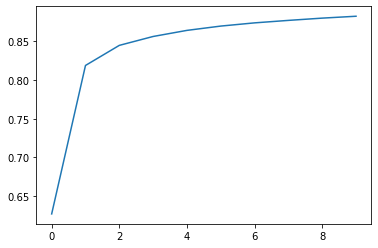

In [9]:
dimX = np.shape(x_train)[1]
dimY = np.shape(y_train)[1]
print(dimY)
input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=dimY, activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

import matplotlib.pyplot as plt
h=model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

plt.plot(h.history["accuracy"])
plt.show()

**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=dimY, activation="softmax")
hidden_layer1 = Dense(units=128, activation="relu")
hidden_layer2 = Dense(units=128, activation="relu")
hidden_layer3 = Dense(units=128, activation="relu")

model1 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")
])
model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

print("------------- Model 1 ----------------")
model1.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

model2 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")
])
model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
print("------------- Model 2 ----------------")

model2.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

model3 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")

])
model3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
print("------------- Model 3 ----------------")

model3.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

------------- Model 1 ----------------
Epoch 1/10
300/300 - 2s - loss: 1.4340 - accuracy: 0.6372 - 2s/epoch - 5ms/step
Epoch 2/10
300/300 - 1s - loss: 0.7151 - accuracy: 0.8336 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.5412 - accuracy: 0.8634 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.4665 - accuracy: 0.8774 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.4236 - accuracy: 0.8856 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.3949 - accuracy: 0.8932 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.3741 - accuracy: 0.8981 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3579 - accuracy: 0.9022 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s - loss: 0.3446 - accuracy: 0.9052 - 1s/epoch - 4ms/step
Epoch 10/10
300/300 - 1s - loss: 0.3336 - accuracy: 0.9079 - 1s/epoch - 4ms/step
------------- Model 2 ----------------
Epoch 1/10
300/300 - 2s - loss: 1.5657 - accuracy: 0.5954 - 2s/epoch - 7ms/step
Epoch 2/10
300/300 - 2s - loss: 0.6654 - 

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [13]:
print(model1.count_params())
print(model2.count_params())
model3.count_params()

101770
118282


134794

In [16]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://www.tensorflow.org/guide/keras/train_and_evaluate#automatically_setting_apart_a_validation_holdout_set) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [20]:
model3_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model 3 ----------------")

model3_bis.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model3_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

print("------------- Model 1 ----------------")
model1_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model1_bis.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model1_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

------------- Model 3 ----------------
Epoch 1/10
420/420 - 3s - loss: 1.5195 - accuracy: 0.5800 - val_loss: 0.7003 - val_accuracy: 0.8264 - 3s/epoch - 7ms/step
Epoch 2/10
420/420 - 2s - loss: 0.5338 - accuracy: 0.8579 - val_loss: 0.4184 - val_accuracy: 0.8833 - 2s/epoch - 5ms/step
Epoch 3/10
420/420 - 2s - loss: 0.3870 - accuracy: 0.8915 - val_loss: 0.3489 - val_accuracy: 0.9004 - 2s/epoch - 5ms/step
Epoch 4/10
420/420 - 3s - loss: 0.3348 - accuracy: 0.9046 - val_loss: 0.3131 - val_accuracy: 0.9087 - 3s/epoch - 7ms/step
Epoch 5/10
420/420 - 3s - loss: 0.3034 - accuracy: 0.9137 - val_loss: 0.2907 - val_accuracy: 0.9151 - 3s/epoch - 6ms/step
Epoch 6/10
420/420 - 2s - loss: 0.2801 - accuracy: 0.9205 - val_loss: 0.2718 - val_accuracy: 0.9202 - 2s/epoch - 5ms/step
Epoch 7/10
420/420 - 2s - loss: 0.2610 - accuracy: 0.9253 - val_loss: 0.2579 - val_accuracy: 0.9259 - 2s/epoch - 5ms/step
Epoch 8/10
420/420 - 2s - loss: 0.2446 - accuracy: 0.9296 - val_loss: 0.2457 - val_accuracy: 0.9285 - 2s/ep

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [21]:
model3_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model 3 ----------------")

model3_bis.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

print("------------- Model 1 ----------------")
model1_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model1_bis.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model1_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

------------- Model 3 ----------------
Epoch 1/10
420/420 - 3s - loss: 0.3338 - accuracy: 0.9029 - val_loss: 0.1674 - val_accuracy: 0.9513 - 3s/epoch - 7ms/step
Epoch 2/10
420/420 - 2s - loss: 0.1274 - accuracy: 0.9609 - val_loss: 0.1346 - val_accuracy: 0.9608 - 2s/epoch - 6ms/step
Epoch 3/10
420/420 - 2s - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1103 - val_accuracy: 0.9677 - 2s/epoch - 5ms/step
Epoch 4/10
420/420 - 2s - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.1016 - val_accuracy: 0.9692 - 2s/epoch - 6ms/step
Epoch 5/10
420/420 - 3s - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.1138 - val_accuracy: 0.9696 - 3s/epoch - 6ms/step
Epoch 6/10
420/420 - 3s - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.1115 - val_accuracy: 0.9708 - 3s/epoch - 6ms/step
Epoch 7/10
420/420 - 2s - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.1098 - val_accuracy: 0.9719 - 2s/epoch - 6ms/step
Epoch 8/10
420/420 - 2s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.1060 - val_accuracy: 0.9732 - 2s/ep

**Question #8.** Using [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

------------- Model 3 ----------------
Epoch 1/10
420/420 - 3s - loss: 130589.0234 - accuracy: 0.1008 - val_loss: 2.3368 - val_accuracy: 0.0966 - 3s/epoch - 8ms/step
Epoch 2/10
420/420 - 3s - loss: 2.3823 - accuracy: 0.1015 - val_loss: 2.3691 - val_accuracy: 0.1006 - 3s/epoch - 6ms/step
Epoch 3/10
420/420 - 3s - loss: 2.4111 - accuracy: 0.1019 - val_loss: 2.6133 - val_accuracy: 0.0989 - 3s/epoch - 6ms/step
Epoch 4/10
420/420 - 2s - loss: 2.4308 - accuracy: 0.0999 - val_loss: 2.4364 - val_accuracy: 0.0966 - 2s/epoch - 6ms/step
Epoch 5/10
420/420 - 2s - loss: 2.4151 - accuracy: 0.1009 - val_loss: 2.4733 - val_accuracy: 0.1006 - 2s/epoch - 5ms/step
Epoch 6/10
Epoch 7/10
420/420 - 2s - loss: 2.4398 - accuracy: 0.1023 - val_loss: 2.4671 - val_accuracy: 0.0966 - 2s/epoch - 6ms/step
Epoch 8/10
420/420 - 2s - loss: 2.4372 - accuracy: 0.0975 - val_loss: 2.3620 - val_accuracy: 0.0966 - 2s/epoch - 5ms/step
Epoch 9/10
420/420 - 2s - loss: 2.4448 - accuracy: 0.0992 - val_loss: 2.3504 - val_accuracy

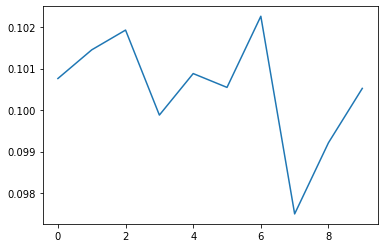

In [10]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=3), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)
plt.plot(h.history["accuracy"])
plt.show()

------------- Model ----------------
Epoch 1/10
420/420 - 7s - loss: 2.1944 - accuracy: 0.2594 - val_loss: 2.0356 - val_accuracy: 0.4518 - 7s/epoch - 16ms/step
Epoch 2/10
420/420 - 2s - loss: 1.8108 - accuracy: 0.5722 - val_loss: 1.5383 - val_accuracy: 0.6834 - 2s/epoch - 5ms/step
Epoch 3/10
420/420 - 2s - loss: 1.3034 - accuracy: 0.7065 - val_loss: 1.0695 - val_accuracy: 0.7517 - 2s/epoch - 5ms/step
Epoch 4/10
420/420 - 4s - loss: 0.9368 - accuracy: 0.7741 - val_loss: 0.7937 - val_accuracy: 0.8184 - 4s/epoch - 8ms/step
Epoch 5/10
420/420 - 3s - loss: 0.7282 - accuracy: 0.8258 - val_loss: 0.6378 - val_accuracy: 0.8492 - 3s/epoch - 6ms/step
Epoch 6/10
420/420 - 2s - loss: 0.6028 - accuracy: 0.8548 - val_loss: 0.5402 - val_accuracy: 0.8688 - 2s/epoch - 6ms/step
Epoch 7/10
420/420 - 2s - loss: 0.5214 - accuracy: 0.8722 - val_loss: 0.4763 - val_accuracy: 0.8814 - 2s/epoch - 6ms/step
Epoch 8/10
420/420 - 3s - loss: 0.4654 - accuracy: 0.8835 - val_loss: 0.4315 - val_accuracy: 0.8876 - 3s/epo

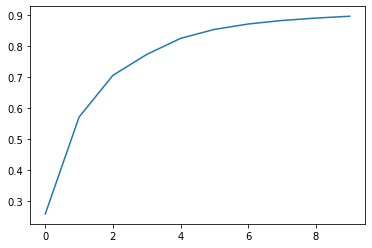

In [11]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)
plt.plot(h.history["accuracy"])
plt.show()

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [26]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)


------------- Model ----------------
Epoch 1/10
420/420 - 3s - loss: 0.3397 - accuracy: 0.9014 - val_loss: 0.1810 - val_accuracy: 0.9465 - 3s/epoch - 7ms/step
Epoch 2/10
420/420 - 3s - loss: 0.1264 - accuracy: 0.9620 - val_loss: 0.1237 - val_accuracy: 0.9629 - 3s/epoch - 6ms/step
Epoch 3/10
420/420 - 3s - loss: 0.0870 - accuracy: 0.9737 - val_loss: 0.1098 - val_accuracy: 0.9681 - 3s/epoch - 6ms/step
Epoch 4/10
420/420 - 2s - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.1197 - val_accuracy: 0.9650 - 2s/epoch - 6ms/step
Epoch 5/10
420/420 - 3s - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.1163 - val_accuracy: 0.9662 - 3s/epoch - 6ms/step
Epoch 6/10
420/420 - 3s - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.1158 - val_accuracy: 0.9667 - 3s/epoch - 6ms/step
Epoch 7/10
420/420 - 3s - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.1128 - val_accuracy: 0.9696 - 3s/epoch - 6ms/step
Epoch 8/10
420/420 - 2s - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.1188 - val_accuracy: 0.9706 - 2s/epoc

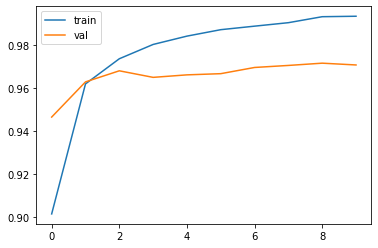

In [27]:
plt.plot(h.history["accuracy"], label="train")
plt.plot(h.history["val_accuracy"], label="val")
plt.legend()
plt.show()


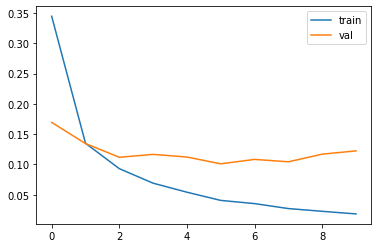

In [19]:
plt.plot(h.history["loss"], label="train")
plt.plot(h.history["val_loss"], label="val")
plt.legend()
plt.show()

In [15]:
print(h.history)

{'loss': [0.3370908498764038, 0.12922178208827972, 0.08662495762109756, 0.06440471857786179, 0.04717715457081795, 0.03937496617436409, 0.03242246434092522, 0.025092830881476402, 0.022837011143565178, 0.0185247752815485], 'accuracy': [0.9009523987770081, 0.9612380862236023, 0.9733571410179138, 0.9804999828338623, 0.9844047427177429, 0.987500011920929, 0.989476203918457, 0.9915476441383362, 0.9921904802322388, 0.9937857389450073], 'val_loss': [0.169785276055336, 0.13922066986560822, 0.1195659339427948, 0.11523612588644028, 0.1271110326051712, 0.11349211633205414, 0.11330565065145493, 0.10742508620023727, 0.11047232896089554, 0.15307030081748962], 'val_accuracy': [0.9501110911369324, 0.9575555324554443, 0.965666651725769, 0.967555582523346, 0.9642778038978577, 0.9693333506584167, 0.9693333506584167, 0.9726666808128357, 0.9737222194671631, 0.9625555276870728]}


Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.hdf5` on your Deepnote project. Only record models if validation loss is lower than for all previous models.

In [22]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3, callbacks=[model_checkpoint_callback])




Epoch 1/10


ValueError: ignored

Use the code below to check that a model has been saved:

In [23]:
!ls -alh "/tmp/checkpoint/model.hdf5"

ls: cannot access '/tmp/checkpoint/model.hdf5': Not a directory


## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) could help.

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

**Question #13.** Set up an [`EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.